## Observations and Insights 

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import sem

# Study data files
mouse_metadata_path = "../Downloads/Mouse_metadata.csv"
study_results_path = "../Downloads/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_df = pd.merge(mouse_metadata, study_results, how="outer", on="Mouse ID")

# Display the data table for preview
mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Checking the number of mice.
mouse_df['Mouse ID'].count()

1893

In [6]:
mouse_df.sort_values('Mouse ID', inplace=True)
mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
460,a203,Infubinol,Female,20,23,30,59.523197,1
461,a203,Infubinol,Female,20,23,35,61.931650,2
459,a203,Infubinol,Female,20,23,25,56.793208,1
458,a203,Infubinol,Female,20,23,20,55.173336,1
457,a203,Infubinol,Female,20,23,15,52.777870,1
...,...,...,...,...,...,...,...,...
1887,z969,Naftisol,Male,9,30,20,57.898778,2
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4


In [7]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_dup_df = mouse_df.duplicated(subset=['Mouse ID', 'Timepoint'])


In [8]:
# Optional: Get all the data for the duplicate mouse ID. 
#mouse_dup_df = mouse_df.duplicated(subset=['Mouse ID', 'Timepoint'])
#mouse_dup_list = mouse_df[mouse_dup_df]
#mouse_dup_list.head()


In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep=False,inplace=True)


In [10]:
# Checking the number of mice in the clean DataFrame.
mouse_df.nunique()

Mouse ID               249
Drug Regimen            10
Sex                      2
Age_months              24
Weight (g)              16
Timepoint               10
Tumor Volume (mm3)    1636
Metastatic Sites         5
dtype: int64

In [11]:
mouse_df.shape

(1883, 8)

## Summary Statistics

In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.


In [13]:
drug_mouse_df = mouse_df.groupby(['Drug Regimen', 'Timepoint'])

In [14]:
mean_tumor = drug_mouse_df['Tumor Volume (mm3)'].mean()
mean_tumor
mean_df = pd.DataFrame(mean_tumor)
ren_mean = mean_df.rename(columns={'Tumor Volume (mm3)':'Tumor Volume (mm3) mean'})

In [15]:
median_tumor = drug_mouse_df['Tumor Volume (mm3)'].median()
median_tumor
median_df = pd.DataFrame(median_tumor)
ren_median = median_df.rename(columns={'Tumor Volume (mm3)':'Tumor Volume (mm3) median'})

In [16]:
variance_tumor = drug_mouse_df['Tumor Volume (mm3)'].var()
variance_df = pd.DataFrame(variance_tumor)
ren_variance = variance_df.rename(columns={'Tumor Volume (mm3)':'Tumor Volume (mm3) variance'})

In [17]:
SEM_tumor = drug_mouse_df['Tumor Volume (mm3)'].sem()
SEM_df = pd.DataFrame(SEM_tumor)
ren_SEM = SEM_df.rename(columns={'Tumor Volume (mm3)':'Tumor Volume (mm3) SEM'})

In [18]:
std = mouse_df.groupby(['Drug Regimen', 'Timepoint']).std()
std_tumor = std['Tumor Volume (mm3)']
std_df = pd.DataFrame(std_tumor)
ren_std = std_df.rename(columns={'Tumor Volume (mm3)':'Tumor Volume (mm3) std dev'})

In [19]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regiment
#NOTES: try pivot, list(zip)

# Using the aggregation method, produce the same summary statistics in a single line
#What is an aggregated method to form summary in a single line?


In [20]:
result = pd.concat([ren_mean, ren_median, ren_variance, ren_SEM, ren_std.reindex(ren_mean.index)], axis=1, sort=False)
result

Tumor Volume (mm3) mean  Tumor Volume (mm3) median  \
Drug Regimen Timepoint                                                       
Capomulin    0                        45.000000                  45.000000   
             5                        44.266086                  45.597064   
             10                       43.084291                  43.421014   
             15                       42.064317                  42.798160   
             20                       40.716325                  40.716428   
...                                         ...                        ...   
Zoniferol    25                       55.432935                  55.676604   
             30                       57.713531                  57.419744   
             35                       60.089372                  60.365832   
             40                       62.916692                  62.274543   
             45                       65.960888                  65.684689   

                        Tumor Volume (mm3) variance  Tumor Volume (mm3) SEM  \
Drug Regimen Timepoint                                                        
Capomulin    0                             0.000000                0.000000   
             5                             5.030889                0.448593   
             10                           12.344133                0.702684   
             15                           16.878693                0.838617   
             20                           19.035028                0.909731   
...                                             ...                     ...   
Zoniferol    25                            5.808348                0.602513   
             30                            9.601024                0.800043   
             35                           10.876760                0.881426   
             40                           13.958456                0.998515   
             45                           14.100301                1.003576   

                        Tumor Volume (mm3) std dev  
Drug Regimen Timepoint                              
Capomulin    0                            0.000000  
             5                            2.242964  
             10                           3.513422  
             15                           4.108369  
             20                           4.362915  
...                                            ...  
Zoniferol    25                           2.410052  
             30                           3.098552  
             35                           3.297993  
             40                           3.736102  
             45                           3.755037  

[100 rows x 5 columns]

## Bar and Pie Charts

In [21]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
total_count = []
drug_mouse_df = mouse_df.groupby(['Drug Regimen'])
total_drug = drug_mouse_df['Drug Regimen'].count()
total_drug = pd.DataFrame(total_drug)
total_drug.append(total_count)
ren_total_drug = total_drug.rename(columns={'Drug Regimen':'Total # of measurements'})
drug_reg_measure = ren_total_drug.reset_index()
drug_reg_measure

,Drug Regimen,Total # of measurements
0,Capomulin,230
1,Ceftamin,178
2,Infubinol,178
3,Ketapril,188
4,Naftisol,186
5,Placebo,181
6,Propriva,151
7,Ramicane,228
8,Stelasyn,181
9,Zoniferol,182


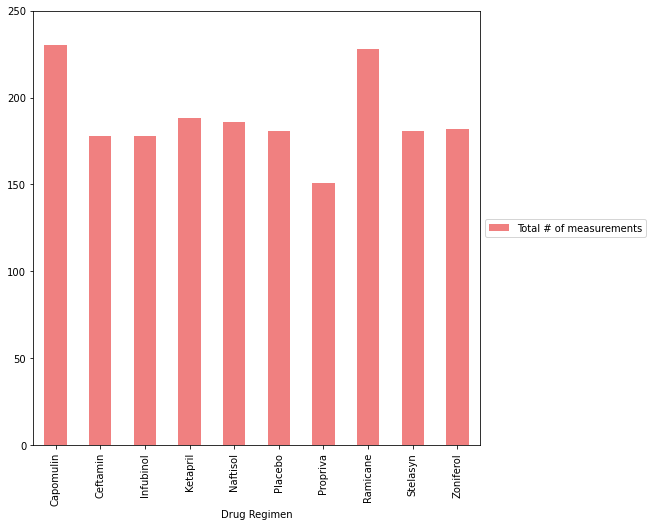

In [22]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
bar = drug_reg_measure.plot.bar(x='Drug Regimen', y='Total # of measurements', rot=0, color='lightcoral', figsize=(8, 8))
plt.xticks(rotation=90)
bar.set_ylim(0, 250)
bar.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [23]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
total_count_distribution = []
male = []
female = []

distribution_df = mouse_df.groupby(['Drug Regimen'])
vsdist = distribution_df['Sex'].value_counts()
vsdist = pd.DataFrame(vsdist)
ren_vsdist = vsdist.rename(columns={'Sex':'Total Count'})
count_vsdist = ren_vsdist.reset_index()
index_count = count_vsdist.set_index('Sex')
index_count = pd.DataFrame(index_count)
female_count = index_count.loc['Female']
female = female_count.append(female)
female_df = pd.DataFrame(female)
female_df.pivot(columns='Drug Regimen', values = 'Total Count')

Drug Regimen,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Sex,,,,,,,,,,
Female,128,92,95,58,86,102,64,74,107,119


In [24]:
male_count = index_count.loc['Male']
male = male_count.append(male)
male_df = pd.DataFrame(male)
male_df.pivot(columns='Drug Regimen', values = 'Total Count')


Drug Regimen,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Sex,,,,,,,,,,
Male,102,86,83,130,100,79,87,154,74,63


In [25]:
male_total = male['Total Count'] 
male_total_count = male_total.sum()

In [26]:
female_total = female['Total Count'] 
female_total_count = female_total.sum()
female_total_count

925

In [27]:
male_df.reset_index()
male_pie = male_df.set_index('Drug Regimen')

In [28]:
female_df.reset_index()
female_pie = female_df.set_index('Drug Regimen')

In [29]:
pie_result = pd.concat([male_pie, female_pie], axis=1, keys=['Male', 'Female'])
pie_result_df = pd.DataFrame(pie_result)

(-1.1056292088476924,
 1.100268057564176,
 -1.1027383052620277,
 1.105693319126339)

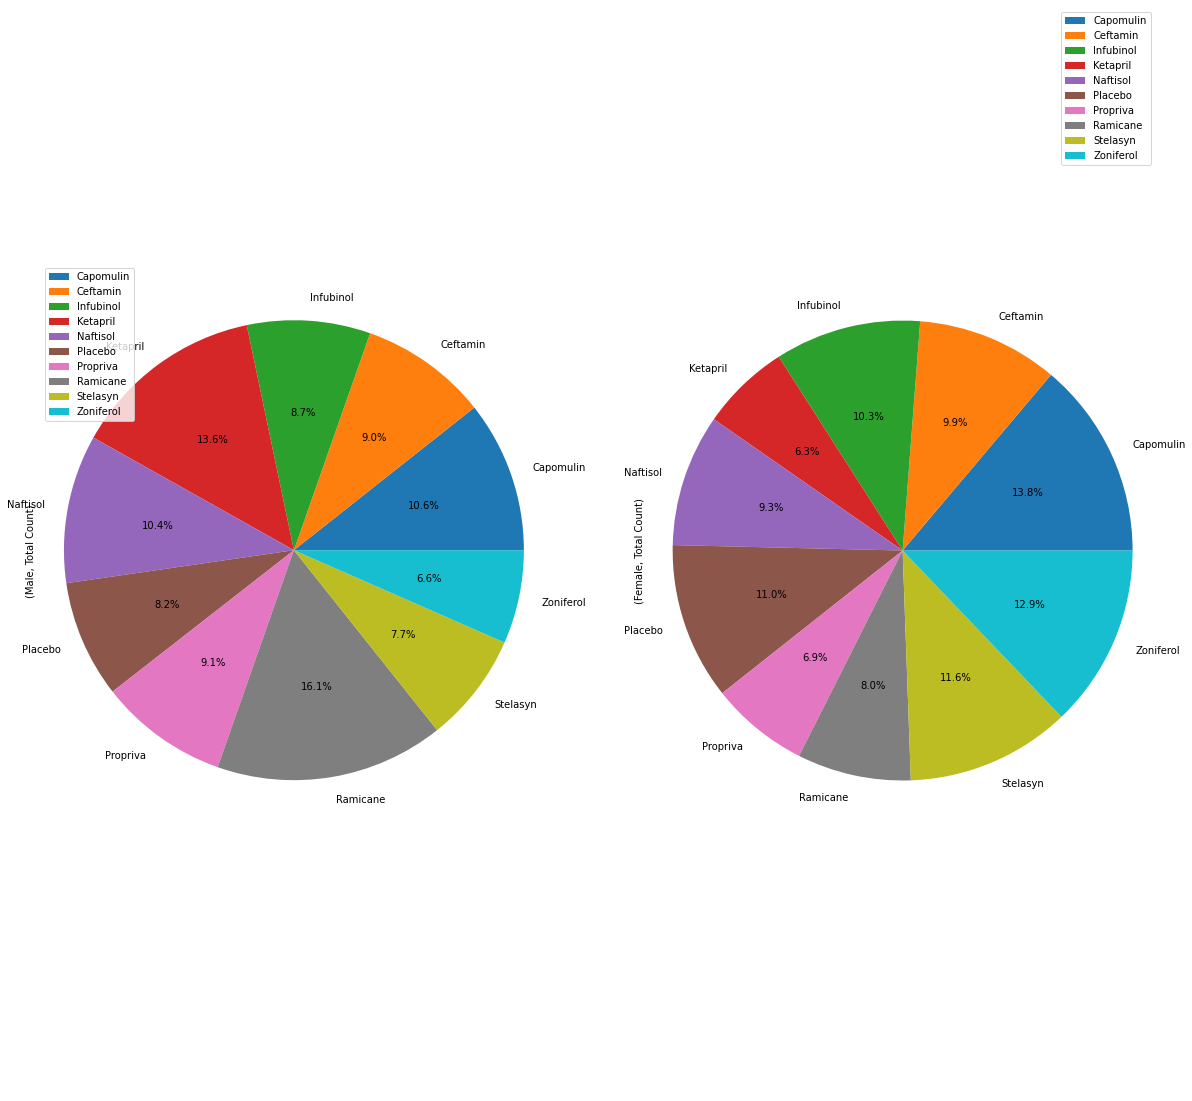

In [30]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

pie_result_df.plot.pie(subplots=True, autopct="%1.1f%%", figsize=(20, 20))
plt.axis("equal")
#plt.show

## Quartiles, Outliers and Boxplots

In [31]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
460,a203,Infubinol,Female,20,23,30,59.523197,1
461,a203,Infubinol,Female,20,23,35,61.931650,2
459,a203,Infubinol,Female,20,23,25,56.793208,1
458,a203,Infubinol,Female,20,23,20,55.173336,1
457,a203,Infubinol,Female,20,23,15,52.777870,1
...,...,...,...,...,...,...,...,...
1887,z969,Naftisol,Male,9,30,20,57.898778,2
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4


In [32]:
# Capomulin, Ramicane, Infubinol, and Ceftamin
limit_mouse = mouse_df.set_index(['Drug Regimen', 'Mouse ID'])
new_limit = limit_mouse.loc[['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']]
new_limit

Sex  Age_months  Weight (g)  Timepoint  \
Drug Regimen Mouse ID                                              
Infubinol    a203      Female          20          23         30   
             a203      Female          20          23         35   
             a203      Female          20          23         25   
             a203      Female          20          23         20   
             a203      Female          20          23         15   
...                       ...         ...         ...        ...   
             z581      Female          24          25         10   
             z581      Female          24          25         15   
             z581      Female          24          25          5   
             z581      Female          24          25          0   
             z581      Female          24          25         20   

                       Tumor Volume (mm3)  Metastatic Sites  
Drug Regimen Mouse ID                                        
Infubinol    a203               59.523197                 1  
             a203               61.931650                 2  
             a203               56.793208                 1  
             a203               55.173336                 1  
             a203               52.777870                 1  
...                                   ...               ...  
             z581               50.478750                 2  
             z581               51.196304                 2  
             z581               49.273092                 1  
             z581               45.000000                 0  
             z581               51.807944                 2  

[814 rows x 6 columns]

In [33]:
capomulin_data = new_limit.loc['Capomulin']
capomulin_data.reset_index()
capomulin_df = pd.DataFrame(capomulin_data)
capo = capomulin_data.groupby('Mouse ID')
capo_max = capo.max()
capo_max_df = pd.DataFrame(capo_max)
ren_capo = capo_max_df.rename(columns={'Tumor Volume (mm3)':'Capomulin'})

In [34]:
ramicane_data = new_limit.loc['Ramicane']
ramicane_data.reset_index()
ramicane_df = pd.DataFrame(ramicane_data)
rami = ramicane_data.groupby('Mouse ID')
rami_max = rami.max()
rami_max_df = pd.DataFrame(rami_max)
ren_rami = rami_max_df.rename(columns={'Tumor Volume (mm3)':'Ramicane'})

In [35]:
infubinol_data = new_limit.loc['Infubinol']
infubinol_data.reset_index()
infubinol_df = pd.DataFrame(infubinol_data)
infu = infubinol_data.groupby('Mouse ID')
infu_max = infu.max()
infu_max_df = pd.DataFrame(infu_max)
ren_infu = infu_max_df.rename(columns={'Tumor Volume (mm3)':'Infubinol'})

In [36]:
ceftamin_data = new_limit.loc['Ceftamin']
ceftamin_data.reset_index()
ceftamin_df = pd.DataFrame(ceftamin_data)
ceft = ceftamin_data.groupby('Mouse ID')
ceft_max = ceft.max()
ceft_max_df = pd.DataFrame(ceft_max)
ren_ceft = ceft_max_df.rename(columns={'Tumor Volume (mm3)':'Ceftamin'})

In [37]:
limit_result = pd.concat([ren_capo, ren_rami, ren_infu, ren_ceft.reindex(ren_capo.index)], axis=1, sort=False)
limit_result.index.name='Mouse ID'
limit_result


,Sex,Age_months,Weight (g),Timepoint,Capomulin,Metastatic Sites,Sex,Age_months,Weight (g),Timepoint,...,Weight (g),Timepoint,Infubinol,Metastatic Sites,Sex,Age_months,Weight (g),Timepoint,Ceftamin,Metastatic Sites
Mouse ID,,,,,,,,,,,,,,,,,,,,,
b128,Female,9.0,22.0,45.0,45.651331,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
b742,Male,7.0,21.0,45.0,45.000000,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
f966,Male,16.0,17.0,20.0,45.000000,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
g288,Male,3.0,19.0,45.0,46.304003,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
g316,Female,22.0,22.0,45.0,46.809225,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
v766,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,27.0,15.0,51.542431,1.0,NaN,NaN,NaN,NaN,NaN,NaN
w193,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,30.0,20.0,50.005138,0.0,NaN,NaN,NaN,NaN,NaN,NaN
w584,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,29.0,30.0,58.268442,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [79]:
limit_tumvol = limit_result[['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']]
limit_tumvol = pd.DataFrame(limit_tumvol)

In [39]:
capo_max_df
capo_reset = capo_max_df.reset_index()

In [40]:
rami_max_df
rami_reset = rami_max_df.reset_index()

In [41]:
infu_max_df
infu_reset = infu_max_df.reset_index()

In [64]:
ceft_max_df
ceft_reset = infu_max_df.reset_index()

In [81]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
def mod_outlier(limit_tumvol):
    df1 = limit_tumvol.copy()
    df = limit_tumvol._get_numeric_data()


    q1 = limit_tumvol.quantile(0.25)
    q3 = limit_tumvol.quantile(0.75)

    iqr = q3 - q1

# Determine outliers using upper and lower bounds
    lower_bound = q1 -(1.5 * iqr) 
    upper_bound = q3 +(1.5 * iqr)


In [75]:
# Put treatments into a list for for loop (and later for plot labels)
Capomulin = []
Ramicane = []
Infubinol = []
Ceftamin = []

# Create empty list to fill with tumor vol data (for plotting)
Limit_tumor_volume_data = []

# Locate the rows which contain mice on each drug and get the tumor volumes
reset_limit_tumvol = limit_tumvol.reset_index()    
    
# add subset 
Capomulin_drop = reset_limit_tumvol.dropna(subset=['Mouse ID', 'Capomulin'])
Ramicane_drop = reset_limit_tumvol.dropna(subset=['Mouse ID', 'Ramicane'])
Infubinol_drop = reset_limit_tumvol.dropna(subset=['Mouse ID', 'Infubinol'])
Ceftamin_drop = reset_limit_tumvol.dropna(subset=['Mouse ID', 'Ceftamin'])



frames = [Capomulin_drop, Ramicane_drop, Infubinol_drop, Ceftamin_drop]
    
combined_limit_tumvol = pd.concat(frames)  



In [76]:
Capomulin_drop = pd.DataFrame(Capomulin_drop)
index_list = Capomulin_drop.index.tolist()
cap_list = Capomulin_drop["Capomulin"].tolist()
Capomulin.append(cap_list)

In [67]:
Ramicane_drop = pd.DataFrame(Ramicane_drop)
index_list = Ramicane_drop.index.tolist()
ram_list = Capomulin_drop["Ramicane"].tolist()
Ramicane.append(ram_list)

In [68]:
Infubinol_drop = pd.DataFrame(Infubinol_drop)
index_list = Infubinol_drop.index.tolist()
infu_list = Capomulin_drop["Infubinol"].tolist()
Infubinol.append(infu_list)

In [78]:
Ceftamin_drop = pd.DataFrame(Ceftamin_drop)
index_list = Ceftamin_drop.index.tolist()
infu_list = Capomulin_drop["Ceftamin"].tolist()
Ceftamin.append(infu_list)

In [82]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
combined_limit_tumvol 

,Mouse ID,Capomulin,Ramicane,Infubinol,Ceftamin
0,b128,45.651331,NaN,NaN,NaN
1,b742,45.000000,NaN,NaN,NaN
2,f966,45.000000,NaN,NaN,NaN
3,g288,46.304003,NaN,NaN,NaN
4,g316,46.809225,NaN,NaN,NaN
...,...,...,...,...,...
70,v766,NaN,NaN,51.542431,NaN
71,w193,NaN,NaN,50.005138,NaN
72,w584,NaN,NaN,58.268442,NaN
73,y163,NaN,NaN,67.685569,NaN


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
